In [98]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import LineCollection

plt.rcParams['figure.dpi'] = 200

84 0.3968253968253968
85 0.3921568627450981
86 0.38759689922480617
87 0.3831417624521073
88 0.37878787878787884
89 0.37453183520599254
90 0.3703703703703704
91 0.3663003663003663
92 0.3623188405797102
93 0.35842293906810035
94 0.3546099290780142
95 0.3508771929824561
96 0.3472222222222222
97 0.34364261168384885
98 0.3401360544217687
99 0.3367003367003367
100 0.3333333333333333
101 0.33003300330033003
102 0.32679738562091504
103 0.3236245954692557
104 0.3205128205128205
105 0.31746031746031744
106 0.3144654088050315
107 0.3115264797507788
108 0.308641975308642
109 0.3058103975535168
110 0.30303030303030304
111 0.3003003003003003
112 0.2976190476190476
113 0.2949852507374632
114 0.29239766081871343
115 0.2898550724637681


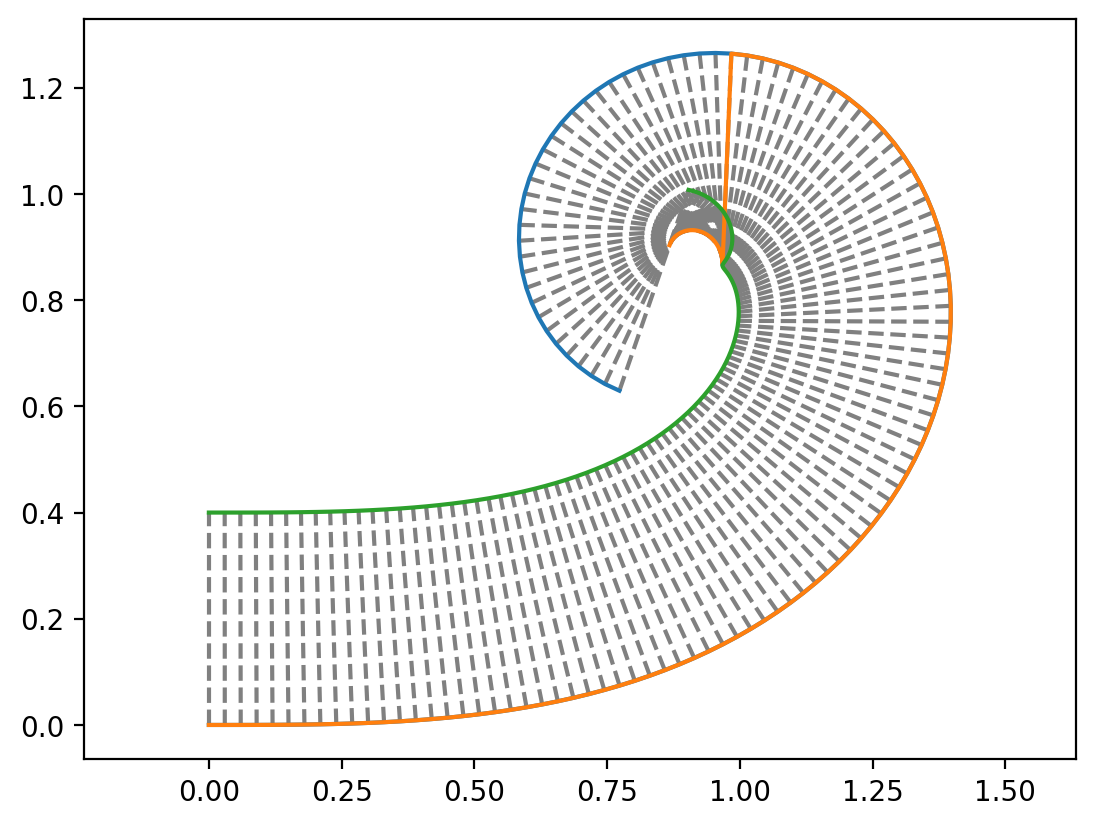

In [99]:
ds = 0.03
s = 0.0
L = 3.5

n = int(L / ds)

def spiral(k0, k1, phi0, offset=0.0):
    x = np.zeros(n)
    y = np.zeros(n)

    xn = 0.0
    yn = 0.0

    for i in range(n):
        t = (i * ds)

        phi =k1 * t**2 / 2.0 + k0 * t + phi0

        x[i] = xn - offset * np.sin(phi)
        y[i] = yn + offset * np.cos(phi)
        
        xn += ds * np.cos(phi)
        yn += ds * np.sin(phi)

    return [x, y]

def spiral_evolute(k0, k1, phi0, offset=0.0):
    x = np.zeros(n)
    y = np.zeros(n)

    xn = 0.0
    yn = 0.0

    for i in range(n):
        t = (i * ds)
        p = 0.0
        curvature = k0 + k1 * t
        if curvature != 0.0 and 1.0 / curvature < offset:
            p = 1.0 / curvature
            print(i, p)
            
        phi = k1 * t**2 / 2.0 + k0 * t + phi0

        x[i] = xn - p * np.sin(phi)
        y[i] = yn + p * np.cos(phi)
        
        xn += ds * np.cos(phi)
        yn += ds * np.sin(phi)

    return [x, y]

def spiral_offset_lines(k0, k1, phi0, offset):
    xn = 0.0
    yn = 0.0

    lines = np.empty(n, dtype=object)

    for i in range(n):
        t = (i * ds)
        phi =k1 * t**2 / 2.0 + k0 * t + phi0

        ox = -offset * np.sin(phi)
        oy = offset * np.cos(phi)
        x0 = xn 
        y0 = yn

        x1 = x0 + ox
        y1 = y0 + oy;

        lines[i] = [(x0, y0), (x1, y1)]
        
        xn += ds * np.cos(phi)
        yn += ds * np.sin(phi)

    return LineCollection(lines, linestyle = "dashed", colors="gray")

k0 = 0.0
k1 = 1.0
phi0 = 0.0

[x0, y0] = spiral(k0, k1, phi0, offset = 0.0)
[x1, y1] = spiral(k0, k1, phi0, offset = 0.4)
[xe0, ye0] = spiral_evolute(k0, k1, phi0, offset = 0.4)
normals = spiral_offset_lines(k0, k1, phi0, offset = 0.4)

fig, ax = plt.subplots()
ax.add_collection(normals)
ax.plot(x0, y0)
ax.plot(xe0, ye0)
ax.plot(x1, y1)
ax.axis('equal')
plt.show()